In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [46]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [47]:
train_df.drop(columns = ['Name'], inplace = True)

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [49]:
train_df.isnull().sum()  

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [50]:
#Filling missing values in continuous columns with their mean   

continuous_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[continuous_columns] = train_df[continuous_columns].fillna(train_df[continuous_columns].mean())

#Filling missing values in categorical columns with their mode
categorical_columns_tofill = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for column in categorical_columns_tofill:
    mode_value = train_df[column].mode()[0]
    train_df[column].fillna(mode_value, inplace = True)

In [51]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [52]:
#Printing unique values in categorical columns
print(f"Unique Values in HomePlanet: {train_df['HomePlanet'].unique()} \n")
print(f"Unique Values in CryoSleep: {train_df['CryoSleep'].unique()} \n")
print(f"Unique Values in Cabin: {train_df['Cabin'].unique()} \n")
print(f"Unique Values in Destination: {train_df['Destination'].unique()} \n")
print(f"Unique Values in VIP: {train_df['VIP'].unique()} \n")

Unique Values in HomePlanet: ['Europa' 'Earth' 'Mars'] 

Unique Values in CryoSleep: [False  True] 

Unique Values in Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Unique Values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] 

Unique Values in VIP: [False  True] 



In [53]:
#Extracting Deck Information
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0] if '/' in x else 'Unknown')
train_df['Num'] = train_df['Cabin'].apply(lambda x: x.split('/')[1] if '/' in x else 'Unknown')
train_df['Side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2] if '/' in x else 'Unknown')

#Extracting Group Information
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])
train_df['Num_pp'] = train_df['PassengerId'].apply(lambda x: x.split('_')[1])

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group,Num_pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0004,01


In [61]:
train_df['Num_pp'] = train_df['Num_pp'].astype(int)

Text(0.5, 1.0, 'Transported Feature Distribution')

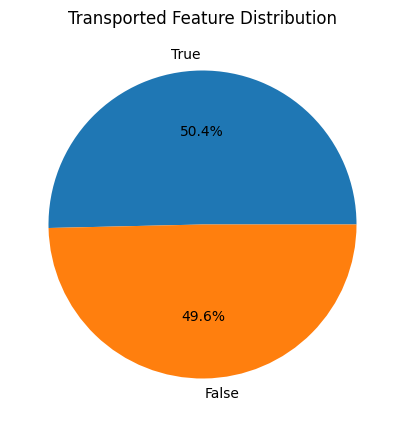

In [54]:
plt.figure(figsize=(5,5))
plt.pie(train_df["Transported"].value_counts(), labels=train_df["Transported"].value_counts().keys(), autopct="%1.1f%%")
plt.title("Transported Feature Distribution")

We can observe that our Transported Feature is highly balanced

So we don't have to use techniques like under_sampling or over_sampling

In [55]:
train_df.head(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group,Num_pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.0,0.000000,0.0,0.000000,False,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.000000,9.0,25.000000,549.0,44.000000,True,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.000000,3576.0,0.000000,6715.0,49.000000,False,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,1283.0,371.000000,3329.0,193.000000,False,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.000000,70.0,151.000000,565.0,2.000000,True,F,1,S,0004,01
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.000000,483.0,0.000000,291.0,0.000000,True,F,0,P,0005,01
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.000000,1539.0,3.000000,0.0,0.000000,True,F,2,S,0006,01
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.000000,0.0,0.000000,0.0,304.854791,True,G,0,S,0006,02
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.000000,785.0,17.000000,216.0,0.000000,True,F,3,S,0007,01
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.000000,0.0,0.000000,0.0,0.000000,True,B,1,P,0008,01


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Deck          8693 non-null   object 
 14  Num           8693 non-null   object 
 15  Side          8693 non-null   object 
 16  Group         8693 non-null   object 
 17  Num_pp        8693 non-null   int64  
dtypes: bool(3), float64(6), int6

In [56]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [63]:
model_Num_pp = ols('Num_pp ~ Transported', data = train_df).fit()
anova_Num_pp = anova_lm(model_Num_pp)
display(anova_Num_pp)

,df,sum_sq,mean_sq,F,PR(>F)
Transported,1.0,42.579781,42.579781,38.476169,5.795692e-10
Residual,8691.0,9617.924303,1.106653,NaN,NaN


In [66]:
correlation_matrix = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num', 'Group', 'Num_pp']].corr()

correlation_matrix

/var/folders/vf/n5r16w615js1vr7tj3mqrj900000gn/T/ipykernel_11117/740912156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num', 'Group', 'Num_pp']].corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num_pp
Age,1.000000,0.067612,0.127937,0.032655,0.120992,0.099210,-0.131425
RoomService,0.067612,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.022360
FoodCourt,0.127937,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.023136
ShoppingMall,0.032655,0.052962,-0.013934,1.000000,0.013678,-0.007189,-0.038388
Spa,0.120992,0.009925,0.220587,0.013678,1.000000,0.147957,0.016637
VRDeck,0.099210,-0.019207,0.224275,-0.007189,0.147957,1.000000,0.009948
Num_pp,-0.131425,-0.022360,0.023136,-0.038388,0.016637,0.009948,1.000000


<Axes: >

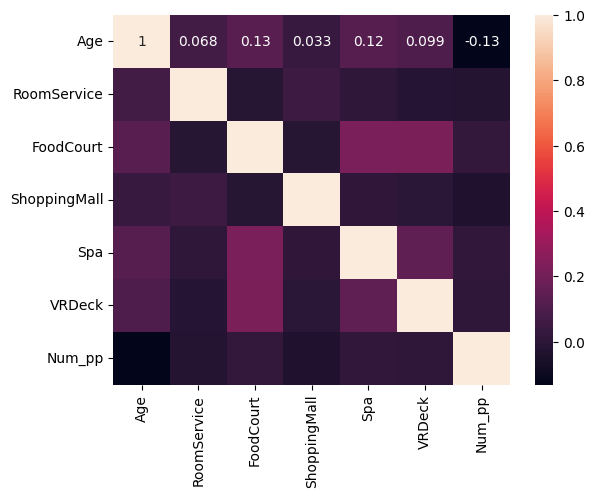

In [69]:
sns.heatmap(correlation_matrix, annot=True)

In [75]:
train_df.columns
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group,Num_pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,1


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Deck          8693 non-null   object 
 14  Num           8693 non-null   object 
 15  Side          8693 non-null   object 
 16  Group         8693 non-null   object 
 17  Num_pp        8693 non-null   int64  
dtypes: bool(3), float64(6), int6

In [81]:
from scipy.stats import chi2_contingency

# Function to perform Chi-square test and return the p-value
def chi_square_test(cat_var1, cat_var2):
    contingency_table = pd.crosstab(train_df[cat_var1], train_df[cat_var2])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Performing the Chi-square test for selected combinations of categorical variables
p_values = {}
p_values['HomePlanet vs Transported'] = chi_square_test('HomePlanet', 'Transported')
p_values['CryoSleep vs Transported'] = chi_square_test('CryoSleep', 'Transported')
p_values['VIP vs Transported'] = chi_square_test('VIP', 'Transported')
p_values['Destination vs Transported'] = chi_square_test('Destination', 'Transported')

p_values

{'HomePlanet vs Transported': 5.549631517016864e-70,
 'CryoSleep vs Transported': 0.0,
 'VIP vs Transported': 0.0006681023600149099,
 'Destination vs Transported': 1.1947894351445014e-23}